In [180]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [181]:
df = pd.read_csv("train.csv")
df.shape # (rows, columns)

(891, 12)

In [182]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [183]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 kişi ölmüş 342 kişi yaşamış

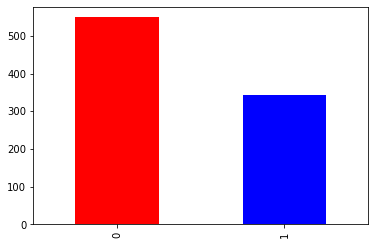

In [184]:
df["Survived"].value_counts().plot(kind="bar",color=["red", "blue"]);

In [185]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

517 kişi erkek 314 kişi kadın

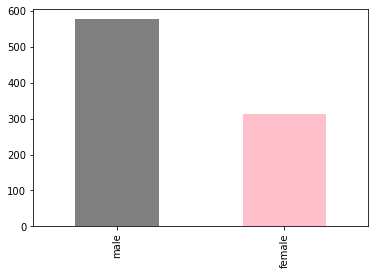

In [186]:
df["Sex"].value_counts().plot(kind="bar",color=["grey", "pink"]);

In [187]:
# Are there any missing values?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
df.Age.fillna(1,inplace=True)

In [189]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
#df=df.drop([Ticket],axis=1)
df=df.drop('Cabin',axis=1)

In [191]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [192]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [193]:
df.Embarked.fillna("S",inplace=True)

In [194]:
df.Embarked.isna().sum()

0

In [195]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [196]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.997946,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.329598,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
pd.crosstab(df.Survived, df.Fare)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,1,0,0,1,1,1,1,0,2,0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,3,0,0,3,1,2,2,3


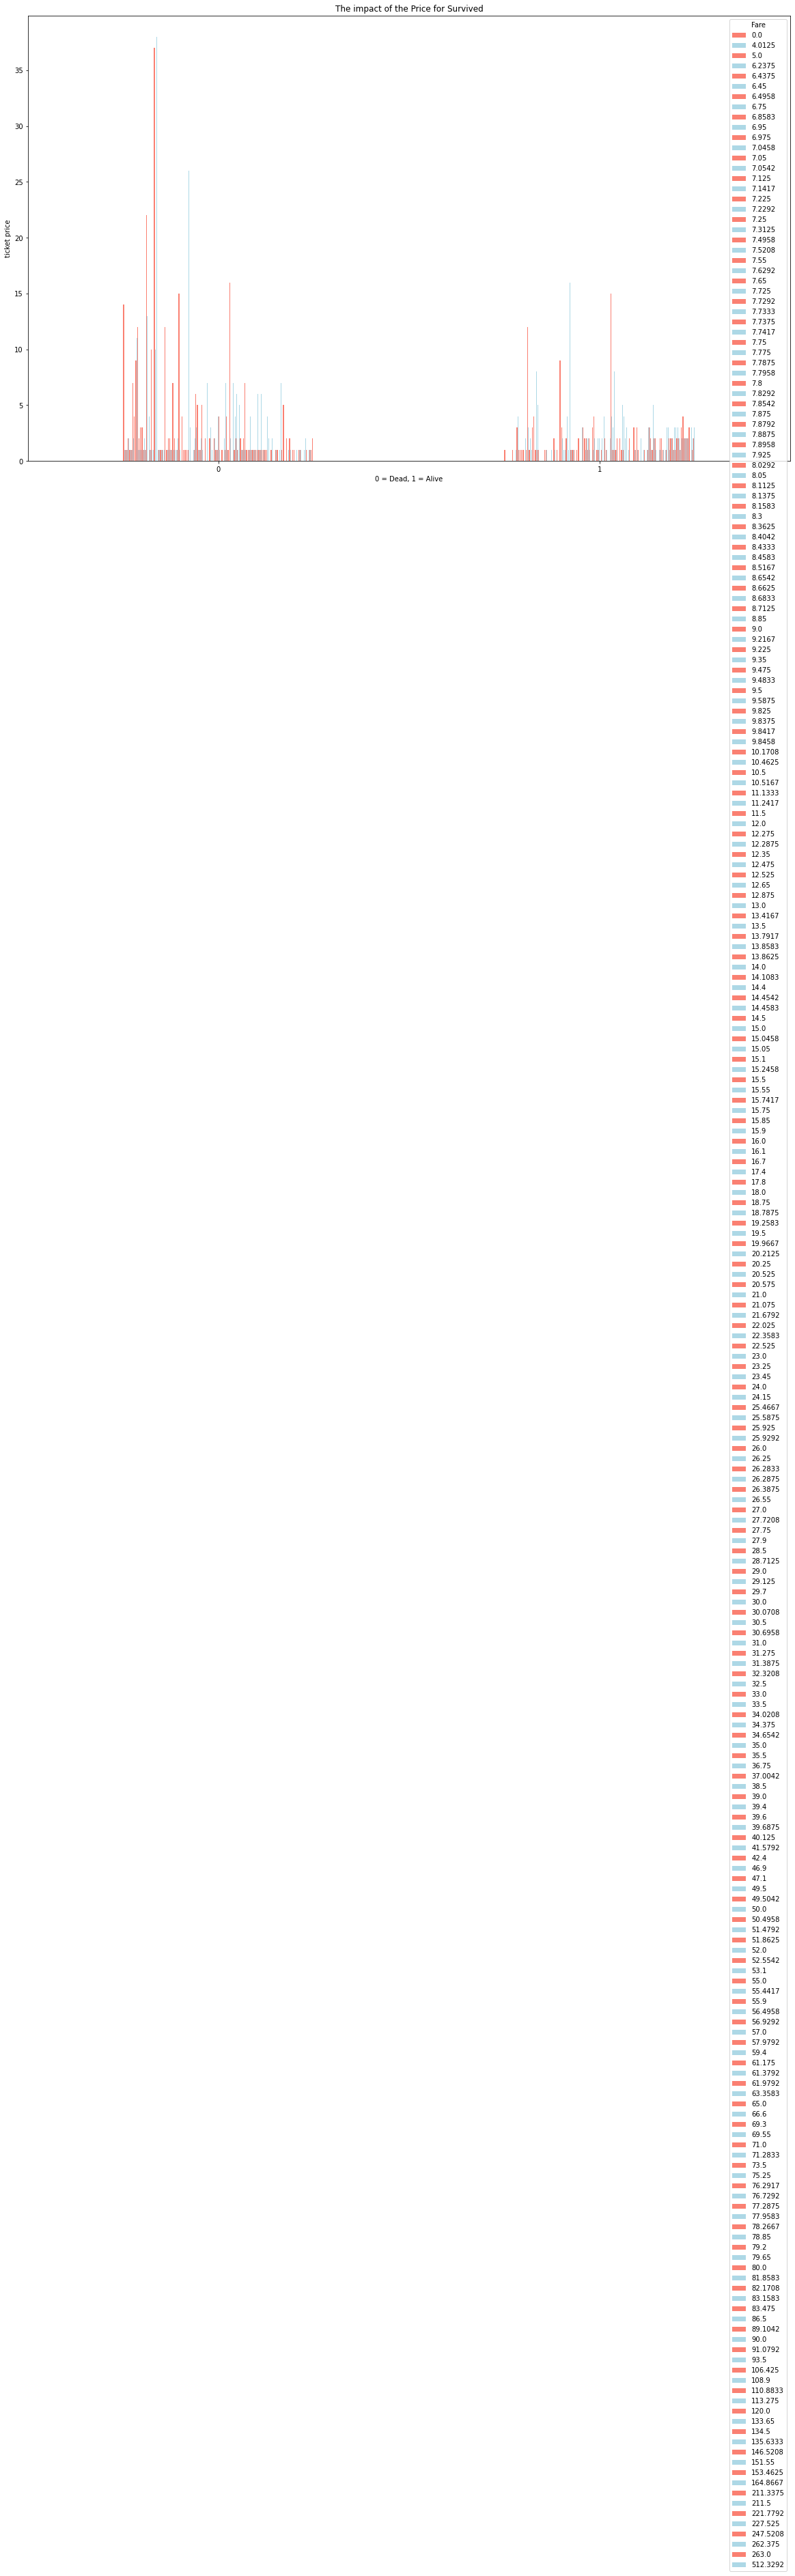

In [198]:
# Create a plot of crosstab
pd.crosstab(df.Survived, df.Fare).plot(kind="bar",
                                    figsize=(20,12),
                                    color=["salmon", "lightblue"])

plt.title("The impact of the Price for Survived")
plt.xlabel("0 = Dead, 1 = Alive")
plt.ylabel("ticket price")
plt.xticks(rotation=0);

In [199]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


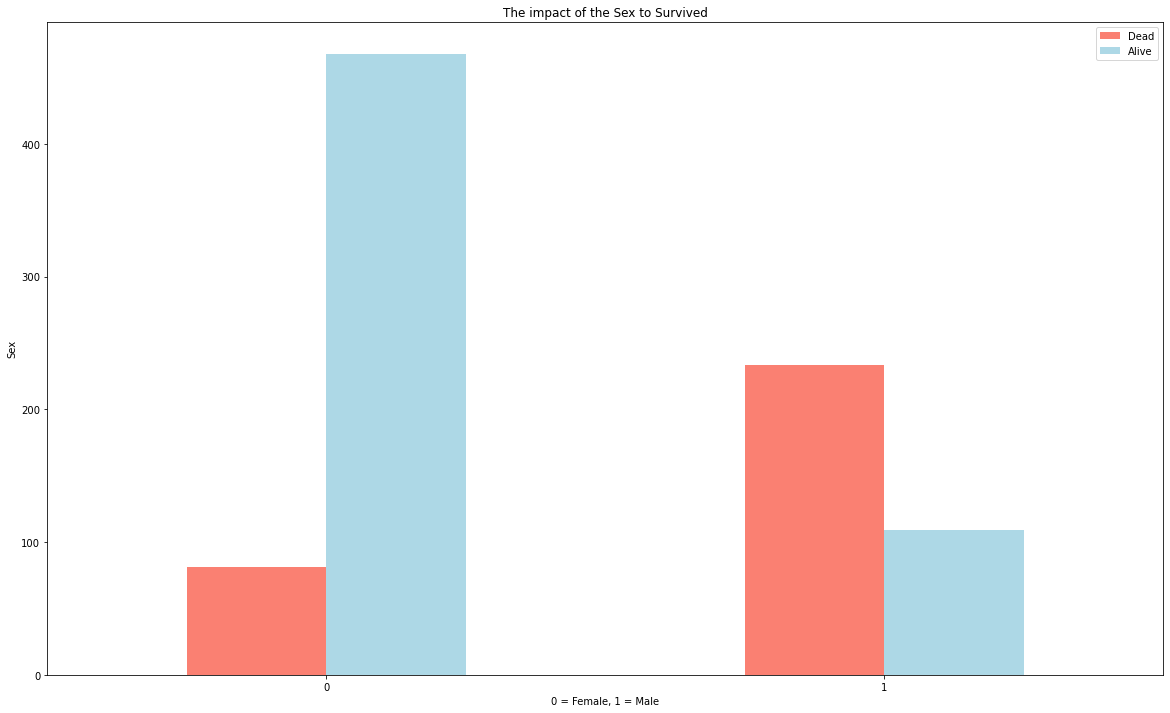

In [200]:
# Create a plot of crosstab
pd.crosstab(df.Survived, df.Sex).plot(kind="bar",
                                    figsize=(20,12),
                                    color=["salmon", "lightblue"])

plt.title("The impact of the Sex to Survived")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Sex")
plt.legend(["Dead", "Alive"]);
plt.xticks(rotation=0);

Kadınların çok daha yüksek bir oranda kurtulduğunu gösteriyor.

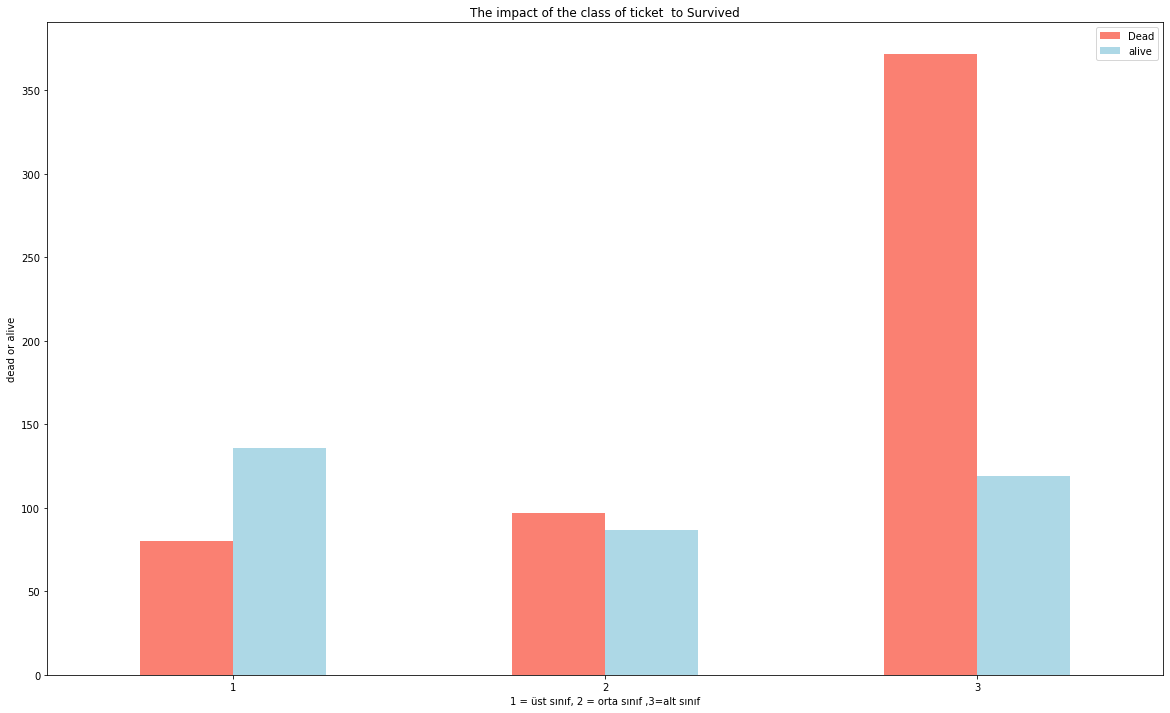

In [201]:
# Create a plot of crosstab
pd.crosstab(df.Pclass,df.Survived).plot(kind="bar",
                                    figsize=(20,12),
                                    color=["salmon", "lightblue"])

plt.title("The impact of the class of ticket  to Survived")
plt.xlabel("1 = üst sınıf, 2 = orta sınıf ,3=alt sınıf")
plt.ylabel("dead or alive")
plt.legend(["Dead", "alive"]);
plt.xticks(rotation=0);

alt sınıfta olanların çlüm oranı çok daha yüksek.

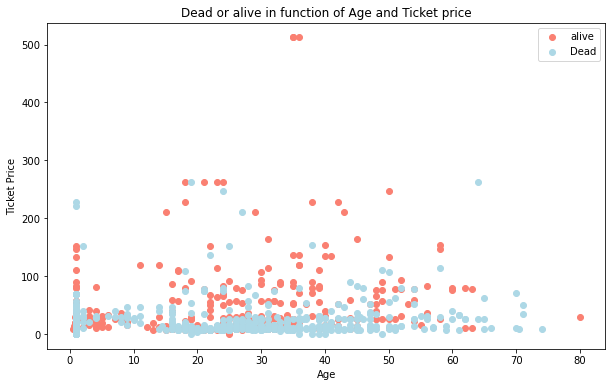

In [202]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.Age[df.Survived==1],
            df.Fare[df.Survived==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Survived==0],
            df.Fare[df.Survived==0],
            c="lightblue")

# Add some helpful info
plt.title("Dead or alive in function of Age and Ticket price")
plt.xlabel("Age")
plt.ylabel("Ticket Price")
plt.legend(["alive", "Dead"]);

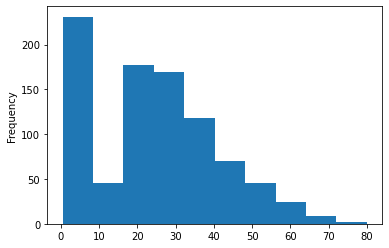

In [203]:
df.Age.plot.hist();

gemide bulunanların yaş ortalamasını düşük olduğu görülüyor.

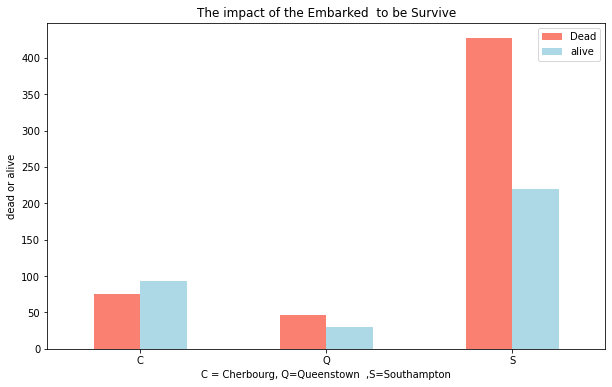

In [204]:
# Create a plot of crosstab
pd.crosstab(df.Embarked,df.Survived).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("The impact of the Embarked  to be Survive")
plt.xlabel("C = Cherbourg, Q=Queenstown  ,S=Southampton")
plt.ylabel("dead or alive")
plt.legend(["Dead", "alive"]);
plt.xticks(rotation=0);

Southamptondan gemiye binenlerin ölüm oranı daha yüksek olduğu görülüyor.

In [205]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038247,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.008577,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.362926,0.083081,0.018443,-0.549500
Age,0.038247,0.008577,-0.362926,1.000000,-0.187066,-0.052395,0.135280
SibSp,-0.057527,-0.035322,0.083081,-0.187066,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.052395,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135280,0.159651,0.216225,1.000000


(7.5, -0.5)

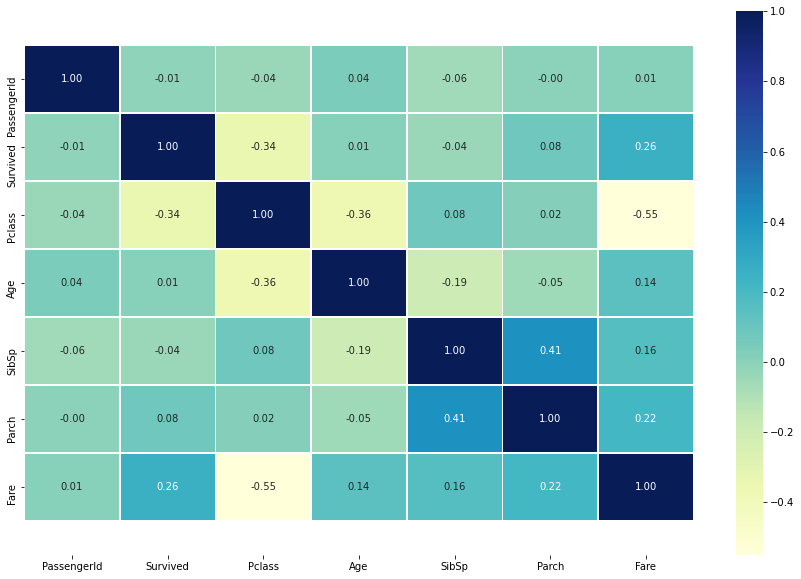

In [206]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Pclass bilet sınıfı ile yolcu ücreti arasında -0.55 lik yüksek bir korelasyon görülüyor.

In [225]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [226]:
# Split data into X and y
#X = df.drop("Survived", axis=1,)
#X = df.drop("Name", axis=1,)

X=df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

y = df["Survived"]

In [227]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [228]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,1.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [229]:
type(df.Embarked)

pandas.core.series.Series

In [230]:
type(df.Sex)

pandas.core.series.Series

In [231]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,1.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [232]:
dummies = pd.get_dummies(X[['Sex', 'Embarked']])
#.get_dummies fonksiyonu dummy kolonlar üretir.

# Drop the column with the independent variable (Balance), and columns for which we created dummy variables
X_ = X.drop(['Sex', 'Embarked'], axis = 1)


# Define the feature set X.
X = pd.concat([X_, dummies], axis = 1)
#X = pd.concat([X_, dummies[['Sex', 'Embarked']]], axis = 1)


#X.info()

In [233]:
X_

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,1.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [234]:
X=X.drop(['Sex_male'],axis=1)

X=X.drop(['Embarked_S'],axis=1)


In [235]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,1,3,22.0,1,0,7.2500,0,0,0
1,2,1,38.0,1,0,71.2833,1,1,0
2,3,3,26.0,0,0,7.9250,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,0
4,5,3,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,0
888,889,3,1.0,1,2,23.4500,1,0,0
889,890,1,26.0,0,0,30.0000,0,1,0


In [236]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [239]:
# Split data into train and test sets
np.random.seed(40)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [240]:
y_train, len(y_train)

(661    0
 393    1
 266    0
 144    0
 446    1
       ..
 440    1
 165    1
 7      0
 219    0
 326    0
 Name: Survived, Length: 712, dtype: int64,
 712)

In [241]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [242]:
from sklearn.pipeline import Pipeline
# Create a pipeline
pipe = Pipeline([('Classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 30),
                 'Classifier__penalty':['l1','l2']},
                {'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[2,3,4,5,6]},
                {'Classifier': [RandomForestClassifier(random_state=0)],
                 'Classifier__n_estimators': [100, 200,300,400,500],
                 'Classifier__max_features': [3,4,5,6,7,8,9]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   RandomForestClassifier(max_features=3, random_state=0))],
 'verbose': False,
 'Classifier': RandomForestClassifier(max_features=3, random_state=0),
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 3,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 100,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 0,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [243]:
model=RandomForestClassifier(max_features=3, random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8435754189944135


In [244]:
comp=pd.DataFrame({"Actual": y_test,"Pred":y_pred});comp

,Actual,Pred
246,0,1
588,0,0
472,1,1
71,0,0
654,0,1
...,...,...
284,0,0
727,1,1
599,1,1
525,0,0


In [135]:
#Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
#Model_coefficients = pd.DataFrame({"Variables":X_train.columns,"Coefficients":np.transpose(model.coef_[0])})
#Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
#print(Model_coefficients)

     Variables  Coefficients
0  PassengerId     -0.001274
1     Survived      4.080303
2       Pclass     -0.501573
3          Age     -0.019960
4        SibSp      0.000000
5        Parch      0.000000
6         Fare      0.000000
7   Sex_female      0.000000
8   Embarked_C      0.000000
9   Embarked_Q      0.000000


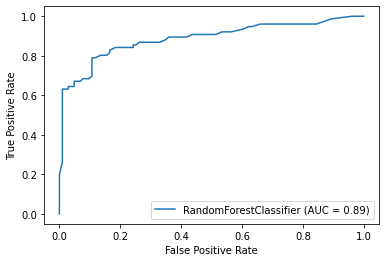

In [246]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(model, X_test, y_test)

In [247]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[92 11]
 [17 59]]


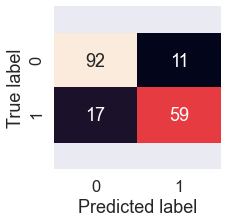

In [251]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

In [252]:
print(classification_report(y_test, y_pred))
#Bütün skorları söyler.precision recall f1 score support gibi

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.84      0.78      0.81        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [253]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001,max_depth=1, random_state=0).fit(X_train, y_train)

In [254]:
y_pred=clf_boost.predict(X_test)
accuracy_score(y_pred, y_test)

0.8044692737430168

In [255]:
clf_boost.feature_importances_

array([0.        , 0.09644784, 0.        , 0.        , 0.        ,
       0.        , 0.90355216, 0.        , 0.        ])

Yaşama veya ölme durumunu en çok etkileyen feature Sex ikincisi ise Bilet sınıfı (Pclass) olarak görünüyor.